In [1]:
from IPython.display import display, HTML
CSS = """
.output_subarea output_javascript rendered_html {
    align-items: center;
}
.output {
    align-items: center;
}
"""
HTML('<style>{}</style>'.format(CSS))

from bqplot import *
from ipywidgets import *
from IPython.display import display
from scipy.interpolate import (interp1d, UnivariateSpline)
import ipywidgets as widgets
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
out = widgets.Output(layout={'border': '1px solid black'})
with out:
    print('h2ello')
    print('h2ello')
    print('h2ello')
    print('h2ello')

out

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

In [3]:
def plot(x1,y1,x2,y2, m, t):
    if (m):
        tiempo.disabled = False
        
        x1 = (x1/60)*(t)
        x2 = (x2/60)*(t)
        y1 = (y1/60)*(t)
        y2 = (y2/60)*(t)
        
        x_data = np.linspace(0, x1, num=1000)
        y_data = np.linspace(y1, 0, num=1000)
        x_sc = LinearScale(min=0)
        if x1>x2:
            x_sc.max = x1*1.5
        else:
            x_sc.max = x2*1.5
        y_sc = LinearScale()
        if y1>y2:
            y_sc.max = y1*1.5
        else:
            y_sc.max = y2*1.5
        ax_x = Axis(label='Actividad Uno', scale=x_sc, tick_format='0.1f')
        ax_y = Axis(label='Actividad Dos', scale=y_sc, orientation='vertical', 
                    tick_format='0.1f', label_offset='3em')

        line = Lines(x=x_data, y=y_data, scales={'x': x_sc, 'y': y_sc}, colors=['red'], 
                     fill='bottom', fill_opacities = [0.3])

        x_dataTwo = np.linspace(0, x2, num=1000)
        y_dataTwo = np.linspace(y2, 0, num=1000)
        lineTwo = Lines(x=x_dataTwo, y=y_dataTwo, scales={'x': x_sc, 'y': y_sc}, colors=['blue'], 
                        fill='bottom', fill_opacities = [0.3])
        
        if (x_data[-1] > x_dataTwo[-1]):
            x_dataThree = x_data
        else:
            x_dataThree = x_dataTwo
            
        if (y_data[1] > y_dataTwo[1]):
            y_dataThree = y_data
        else:
            y_dataThree = y_dataTwo
        
        lineThree = Lines(x=x_dataThree, y=y_dataThree, scales={'x': x_sc, 'y': y_sc}, colors=['green'])
        
        fig = Figure(axes=[ax_x, ax_y], marks=[line, lineTwo, lineThree], title='Curva de Posibilidades de Producción')
        fig.layout.height = '350px'
        fig.layout.width = '600px'

        actividadXUno.description = 'P1 X Min:'
        actividadYUno.description = 'P1 Y Min:'
        actividadXDos.description = 'P2 X Min:'
        actividadYDos.description = 'P2 Y Min:'
        
        COP1XVar = actividadYUno.value / actividadXUno.value
        COP1YVar = actividadXUno.value / actividadYUno.value
        COP2XVar = actividadYDos.value / actividadXDos.value
        COP2YVar = actividadXDos.value / actividadYDos.value

        out.clear_output()
        with out:
            if (actividadXUno.value > actividadXDos.value):
                print("   P1 tiene V.A. en X.")
            elif (actividadXDos.value > actividadXUno.value):
                print("   P2 tiene V.A. en X.")
            else:
                print("   Ninguno tiene V.A. en X")

            if (actividadYUno.value > actividadYDos.value):
                print("   P1 tiene V.A. en Y.")
            elif (actividadYDos.value > actividadYUno.value):
                print("   P2 tiene V.A. en Y.")
            else:
                print("   Ninguno tiene V.A. en Y")
            print("   CO de X para P1 : " , COP1XVar)
            print("   CO de Y para P1 : " , COP1YVar)
            print("   CO de X para P1 : " , COP2XVar)
            print("   CO de Y para P1 : " , COP2YVar)
            if (COP1XVar < COP2XVar):
                print("   P1 tiene V.C. en X.")
            elif (COP2XVar < COP1XVar):
                print("   P2 tiene V.C. en X.")
            else:
                print("   Ninguno tiene V.C. en X")
            if (COP1YVar < COP2YVar):
                print("   P1 tiene V.C. en Y.")
            elif (COP2YVar < COP1YVar):
                print("   P2 tiene V.C. en Y.")
            else:
                print("   Ninguno tiene V.C. en Y")
        display(fig)
        
    else:
        tiempo.disabled = True
        actividadXUno.description = 'P1 Max X:'
        actividadYUno.description = 'P1 Max Y:'
        actividadXDos.description = 'P2 Max X:'
        actividadYDos.description = 'P2 Max Y:'
        
        x_data = np.linspace(0, x1, num=1000)
        y_data = np.linspace(y1, 0, num=1000)
        x_sc = LinearScale(min=0)
        if x1>x2:
            x_sc.max = x1*2
        else:
            x_sc.max = x2*2
        y_sc = LinearScale()
        if y1>y2:
            y_sc.max = y1*2
        else:
            y_sc.max = y2*2
        ax_x = Axis(label='Actividad Uno', scale=x_sc, tick_format='0.1f')
        ax_y = Axis(label='Actividad Dos', scale=y_sc, orientation='vertical', 
                    tick_format='0.1f', label_offset='3em')

        line = Lines(x=x_data, y=y_data, scales={'x': x_sc, 'y': y_sc}, colors=['red'], 
                     fill='bottom', fill_opacities = [0.3])

        x_dataTwo = np.linspace(0, x2, num=1000)
        y_dataTwo = np.linspace(y2, 0, num=1000)
        lineTwo = Lines(x=x_dataTwo, y=y_dataTwo, scales={'x': x_sc, 'y': y_sc}, colors=['blue'], 
                        fill='bottom', fill_opacities = [0.3])

        if (x_data[-1] > x_dataTwo[-1]):
            pointX = x_data[-1]
        else:
            pointX = x_dataTwo[-1]
            
        if (y_data[1] > y_dataTwo[1]):
            pointY = y_data[1]
        else:
            pointY = y_dataTwo[1]
        
        points = np.array([(0, y1+y2), (pointX, pointY),(x1+x2,0)])
        x_three = points[:,0]
        y_three = points[:,1]
        fPoly = interp1d(x_three, y_three, kind="nearest",)
        x_dataThree = np.linspace(x_three[0], x_three[-1], num=1000)
        y_dataThree = fPoly(x_dataThree)
        
        lineThree = Lines(x=x_dataThree, y=y_dataThree, scales={'x': x_sc, 'y': y_sc}, colors=['green'])
        
        point = Scatter(x=[pointX], y=[pointY], scales={'x': x_sc, 'y': y_sc}, colors=['yellow'])
        
        fig = Figure(axes=[ax_x, ax_y], marks=[line, lineTwo, lineThree, point], title='Curva de Posibilidades de Producción')
        fig.layout.height = '350px'
        fig.layout.width = '600px'

        COP1XVar = actividadYUno.value / actividadXUno.value
        COP1YVar = actividadXUno.value / actividadYUno.value
        COP2XVar = actividadYDos.value / actividadXDos.value
        COP2YVar = actividadXDos.value / actividadYDos.value

        out.clear_output()
        with out:
            if (actividadXUno.value > actividadXDos.value):
                print("   P1 tiene V.A. en X.")
            elif (actividadXDos.value > actividadXUno.value):
                print("   P2 tiene V.A. en X.")
            else:
                print("   Ninguno tiene V.A. en X")

            if (actividadYUno.value > actividadYDos.value):
                print("   P1 tiene V.A. en Y.")
            elif (actividadYDos.value > actividadYUno.value):
                print("   P2 tiene V.A. en Y.")
            else:
                print("   Ninguno tiene V.A. en Y")
            print("   CO de X para P1 : " , COP1XVar)
            print("   CO de Y para P1 : " , COP1YVar)
            print("   CO de X para P1 : " , COP2XVar)
            print("   CO de Y para P1 : " , COP2YVar)
            if (COP1XVar < COP2XVar):
                print("   P1 tiene V.C. en X.")
            elif (COP2XVar < COP1XVar):
                print("   P2 tiene V.C. en X.")
            else:
                print("   Ninguno tiene V.C. en X")
            if (COP1YVar < COP2YVar):
                print("   P1 tiene V.C. en Y.")
            elif (COP2YVar < COP1YVar):
                print("   P2 tiene V.C. en Y.")
            else:
                print("   Ninguno tiene V.C. en Y")
        display(fig)
    
actividadXUno = widgets.FloatText( value=24, description='P1 Max X:', disabled=False)
actividadYUno = widgets.FloatText( value=12, description='P1 Max Y:', disabled=False)
actividadXDos = widgets.FloatText( value=12, description='P2 Max X:', disabled=False)
actividadYDos = widgets.FloatText( value=24, description='P2 Max Y:', disabled=False)

tiempo = widgets.FloatText(value=1, description='Horas:', disabled=True)
minutos = widgets.Checkbox(value=False, description='Minutos', disabled=False )

out = widgets.Output()

left_box = widgets.VBox([actividadXUno, actividadXDos, minutos])
center_box = widgets.VBox([actividadYUno, actividadYDos, tiempo])
right_box = widgets.VBox([out])
controls = widgets.HBox([left_box, center_box, right_box])
interactive_plot = widgets.interactive_output(plot, {'x1': actividadXUno, 'y1': actividadYUno, 'x2': actividadXDos, 'y2': actividadYDos, 'm': minutos, 't': tiempo})

display(controls, interactive_plot)

Output()

In [4]:
def plot(x1,y1,x2,y2, m, t):
    if (m):
        tiempo.disabled = False
        
        x1 = (x1/60)*(t)
        x2 = (x2/60)*(t)
        y1 = (y1/60)*(t)
        y2 = (y2/60)*(t)
        
        x_data = np.linspace(0, x1, num=1000)
        y_data = np.linspace(y1, 0, num=1000)
        x_sc = LinearScale(min=0)
        if x1>x2:
            x_sc.max = x1*1.5
        else:
            x_sc.max = x2*1.5
        y_sc = LinearScale()
        if y1>y2:
            y_sc.max = y1*1.5
        else:
            y_sc.max = y2*1.5
        ax_x = Axis(label='Actividad Uno', scale=x_sc, tick_format='0.1f')
        ax_y = Axis(label='Actividad Dos', scale=y_sc, orientation='vertical', 
                    tick_format='0.1f', label_offset='3em')

        line = Lines(x=x_data, y=y_data, scales={'x': x_sc, 'y': y_sc}, colors=['red'], 
                     fill='bottom', fill_opacities = [0.3])

        x_dataTwo = np.linspace(0, x2, num=1000)
        y_dataTwo = np.linspace(y2, 0, num=1000)
        lineTwo = Lines(x=x_dataTwo, y=y_dataTwo, scales={'x': x_sc, 'y': y_sc}, colors=['blue'], 
                        fill='bottom', fill_opacities = [0.3])
        
        if (x_data[-1] > x_dataTwo[-1]):
            x_dataThree = x_data
        else:
            x_dataThree = x_dataTwo
            
        if (y_data[1] > y_dataTwo[1]):
            y_dataThree = y_data
        else:
            y_dataThree = y_dataTwo
        
        lineThree = Lines(x=x_dataThree, y=y_dataThree, scales={'x': x_sc, 'y': y_sc}, colors=['green'])
        
        fig = Figure(axes=[ax_x, ax_y], marks=[line, lineTwo, lineThree], title='Curva de Posibilidades de Producción')
        fig.layout.height = '350px'
        fig.layout.width = '600px'

        actividadXUno.description = 'P1 X Min:'
        actividadYUno.description = 'P1 Y Min:'
        actividadXDos.description = 'P2 X Min:'
        actividadYDos.description = 'P2 Y Min:'
        
        COP1XVar = actividadYUno.value / actividadXUno.value
        COP1YVar = actividadXUno.value / actividadYUno.value
        COP2XVar = actividadYDos.value / actividadXDos.value
        COP2YVar = actividadXDos.value / actividadYDos.value

        out.clear_output()
        with out:
            if (actividadXUno.value > actividadXDos.value):
                print("   P1 tiene V.A. en X.")
            elif (actividadXDos.value > actividadXUno.value):
                print("   P2 tiene V.A. en X.")
            else:
                print("   Ninguno tiene V.A. en X")

            if (actividadYUno.value > actividadYDos.value):
                print("   P1 tiene V.A. en Y.")
            elif (actividadYDos.value > actividadYUno.value):
                print("   P2 tiene V.A. en Y.")
            else:
                print("   Ninguno tiene V.A. en Y")
            print("   CO de X para P1 : " , COP1XVar)
            print("   CO de Y para P1 : " , COP1YVar)
            print("   CO de X para P1 : " , COP2XVar)
            print("   CO de Y para P1 : " , COP2YVar)
            if (COP1XVar < COP2XVar):
                print("   P1 tiene V.C. en X.")
            elif (COP2XVar < COP1XVar):
                print("   P2 tiene V.C. en X.")
            else:
                print("   Ninguno tiene V.C. en X")
            if (COP1YVar < COP2YVar):
                print("   P1 tiene V.C. en Y.")
            elif (COP2YVar < COP1YVar):
                print("   P2 tiene V.C. en Y.")
            else:
                print("   Ninguno tiene V.C. en Y")
        display(fig)
        
    else:
        tiempo.disabled = True
        actividadXUno.description = 'P1 Max X:'
        actividadYUno.description = 'P1 Max Y:'
        actividadXDos.description = 'P2 Max X:'
        actividadYDos.description = 'P2 Max Y:'
        
        x_data = np.linspace(0, x1, num=1000)
        y_data = np.linspace(y1, 0, num=1000)
        x_sc = LinearScale(min=0)
        if x1>x2:
            x_sc.max = x1*2
        else:
            x_sc.max = x2*2
        y_sc = LinearScale()
        if y1>y2:
            y_sc.max = y1*2
        else:
            y_sc.max = y2*2
        ax_x = Axis(label='Actividad Uno', scale=x_sc, tick_format='0.1f')
        ax_y = Axis(label='Actividad Dos', scale=y_sc, orientation='vertical', 
                    tick_format='0.1f', label_offset='3em')

        line = Lines(x=x_data, y=y_data, scales={'x': x_sc, 'y': y_sc}, colors=['red'], 
                     fill='bottom', fill_opacities = [0.3])

        x_dataTwo = np.linspace(0, x2, num=1000)
        y_dataTwo = np.linspace(y2, 0, num=1000)
        lineTwo = Lines(x=x_dataTwo, y=y_dataTwo, scales={'x': x_sc, 'y': y_sc}, colors=['blue'], 
                        fill='bottom', fill_opacities = [0.3])

        COP1XVar = actividadYUno.value / actividadXUno.value
        COP1YVar = actividadXUno.value / actividadYUno.value
        COP2XVar = actividadYDos.value / actividadXDos.value
        COP2YVar = actividadXDos.value / actividadYDos.value
        
        if (x_data[-1] > x_dataTwo[-1]):
            pointX = x_data[-1]
        else:
            pointX = x_dataTwo[-1]
            
        if (y_data[1] > y_dataTwo[1]):
            pointY = y_data[1]
        else:
            pointY = y_dataTwo[1]
        
        
        
        points = np.array([(0, y1+y2), (pointX, pointY),(x1+x2,0)])
        
        
        x_three = points[:,0]
        y_three = points[:,1]
        fPoly = UnivariateSpline(x_three, y_three, k=1)
        x_dataThree = np.linspace(x_three[0], x_three[-1], num=1000)
        y_dataThree = fPoly(x_dataThree)
        
        lineThree = Lines(x=x_dataThree, y=y_dataThree, scales={'x': x_sc, 'y': y_sc}, colors=['green'])
        
        point = Scatter(x=[pointX], y=[pointY], scales={'x': x_sc, 'y': y_sc}, colors=['yellow'])
        
        fig = Figure(axes=[ax_x, ax_y], marks=[line, lineTwo, lineThree, point], title='Curva de Posibilidades de Producción')
        fig.layout.height = '350px'
        fig.layout.width = '600px'

        

        out.clear_output()
        with out:
            if (actividadXUno.value > actividadXDos.value):
                print("   P1 tiene V.A. en X.")
            elif (actividadXDos.value > actividadXUno.value):
                print("   P2 tiene V.A. en X.")
            else:
                print("   Ninguno tiene V.A. en X")

            if (actividadYUno.value > actividadYDos.value):
                print("   P1 tiene V.A. en Y.")
            elif (actividadYDos.value > actividadYUno.value):
                print("   P2 tiene V.A. en Y.")
            else:
                print("   Ninguno tiene V.A. en Y")
            print("   CO de X para P1 : " , COP1XVar)
            print("   CO de Y para P1 : " , COP1YVar)
            print("   CO de X para P1 : " , COP2XVar)
            print("   CO de Y para P1 : " , COP2YVar)
            if (COP1XVar < COP2XVar):
                print("   P1 tiene V.C. en X.")
            elif (COP2XVar < COP1XVar):
                print("   P2 tiene V.C. en X.")
            else:
                print("   Ninguno tiene V.C. en X")
            if (COP1YVar < COP2YVar):
                print("   P1 tiene V.C. en Y.")
            elif (COP2YVar < COP1YVar):
                print("   P2 tiene V.C. en Y.")
            else:
                print("   Ninguno tiene V.C. en Y")
        display(fig)
    
actividadXUno = widgets.FloatText( value=24, description='P1 Max X:', disabled=False)
actividadYUno = widgets.FloatText( value=12, description='P1 Max Y:', disabled=False)
actividadXDos = widgets.FloatText( value=12, description='P2 Max X:', disabled=False)
actividadYDos = widgets.FloatText( value=24, description='P2 Max Y:', disabled=False)

tiempo = widgets.FloatText(value=1, description='Horas:', disabled=True)
minutos = widgets.Checkbox(value=False, description='Minutos', disabled=False )

out = widgets.Output()

left_box = widgets.VBox([actividadXUno, actividadXDos, minutos])
center_box = widgets.VBox([actividadYUno, actividadYDos, tiempo])
right_box = widgets.VBox([out])
controls = widgets.HBox([left_box, center_box, right_box])
interactive_plot = widgets.interactive_output(plot, {'x1': actividadXUno, 'y1': actividadYUno, 'x2': actividadXDos, 'y2': actividadYDos, 'm': minutos, 't': tiempo})

display(controls, interactive_plot)

Output()

Grafica con 
y=\sqrt{1-x^2}
Medio Circulo como PPC
-\sqrt{1-\left(x-1\right)^2}+1\ \left\{0<x<1\right\}
Grafica que ya tengo

Grafica con
Crecimiento del primero

10 20
15 30


In [5]:
30/60

0.5

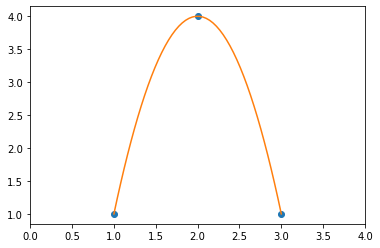

In [6]:
points = np.array([(1, 1), (2, 4), (3, 1)])
# get x and y vectors
x = points[:,0]
y = points[:,1]

# calculate polynomial
z = np.polyfit(x, y, 2)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

plt.plot(x,y,'o', x_new, y_new)
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()